<a href="https://colab.research.google.com/github/anandam06201/100-MW-pv-solar-power-plant/blob/main/KWH_deviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
path="INVERTER_15MIN_REPORT_08 05 2024_22 45 13.csv"

In [ ]:
df=pd.read_csv(path)
matrix=[i for i in range(25)]
m=2
for i in range(25):
    matrix[i]= df.iloc[m:m+840,0:13]
m=m+843

In [ ]:
def date_time(matrix_form_data):
    for i in range(25):

        matrix_form_data[i]['datetime']=pd.to_datetime(matrix_form_data[i]['Unnamed: 0'],dayfirst=True)
        matrix_form_data[i]= matrix_form_data[i].set_index(['datetime'])
    return matrix_form_data

In [ ]:
def time_intervals(data):
    data_time_interval=[i for i in range(25)]

    for i in range(25):
        data_time_interval[i]=data[i].asfreq(freq='15min')





    return data_time_interval

In [ ]:
columns=['I1_acpower','I1_dcpower','I1_acenergy','I2_acpower','I2_dcpower','I2_acenergy','I3_acpower','I3_dcpower','I3_acenergy','I4_acpower','I4_dcpower','I4_acenergy']
x=date_time(matrix)
y=time_intervals(x)
y[0].columns

Index(['Unnamed: 0', '08/05/2024', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [ ]:
for i in range(25):
    y[i] = y[i].drop('Unnamed: 0', axis=1)
    y[i]=y[i].set_axis(columns,axis='columns')
    y[i]=y[i].astype(float)

In [ ]:
y[0].info()
y[0].columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132298 entries, 2020-07-30 17:04:00 to 2024-05-08 19:19:00
Freq: 15T
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   I1_acpower   52 non-null     float64
 1   I1_dcpower   52 non-null     float64
 2   I1_acenergy  52 non-null     float64
 3   I2_acpower   52 non-null     float64
 4   I2_dcpower   52 non-null     float64
 5   I2_acenergy  52 non-null     float64
 6   I3_acpower   52 non-null     float64
 7   I3_dcpower   52 non-null     float64
 8   I3_acenergy  52 non-null     float64
 9   I4_acpower   52 non-null     float64
 10  I4_dcpower   52 non-null     float64
 11  I4_acenergy  52 non-null     float64
dtypes: float64(12)
memory usage: 13.1 MB


Index(['I1_acpower', 'I1_dcpower', 'I1_acenergy', 'I2_acpower', 'I2_dcpower',
       'I2_acenergy', 'I3_acpower', 'I3_dcpower', 'I3_acenergy', 'I4_acpower',
       'I4_dcpower', 'I4_acenergy'],
      dtype='object')

In [ ]:
def inverter_energy(date_time):
    for i in range(25):
        date_time[i]=date_time[i][['I1_acenergy','I2_acenergy','I3_acenergy','I4_acenergy']]

    return date_time


def add_sum_energy(data):
    for i in range(25):
        g=pd.Series(data[i]['I1_acenergy'])
        g1=[((g[i]-g[i-1])*1000) for i in range(len(g))]
        for m in range(len(g1)):
            if g1[m]<0:
                g1[m]=0

        h=pd.Series(data[i]['I2_acenergy'])
        h1=[((h[i]-h[i-1])*1000) for i in range(len(h))]
        for m in range(len(h1)):
            if h1[m]<0:
                h1[m]=0
        k=pd.Series(data[i]['I3_acenergy'])
        k1=[((k[i]-k[i-1])*1000) for i in range(len(k))]
        for m in range(len(k1)):
            if k1[m]<0:
                k1[m]=0
        j=pd.Series(data[i]['I4_acenergy'])
        j1=[((j[i]-j[i-1])*1000) for i in range(len(j))]
        for m in range(len(j1)):
            if j1[m]<0:
                j1[m]=0

        data[i]['I1']=g1
        data[i]['I2']=h1
        data[i]["I3"]=k1
        data[i]['I4']=j1
    return data



def lineplot_block_inverter_energy(i):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(10)


    plt.plot(l[i]['I1'],label='I1')
    plt.plot(l[i]['I2'],label='I2')
    plt.plot(l[i]['I3'],label='I3')
    plt.plot(l[i]['I4'],label='I4')
    plt.legend()
    plt.grid()

    plt.show()






In [ ]:
z_kwh=inverter_energy(y)
l=add_sum_energy(z_kwh)


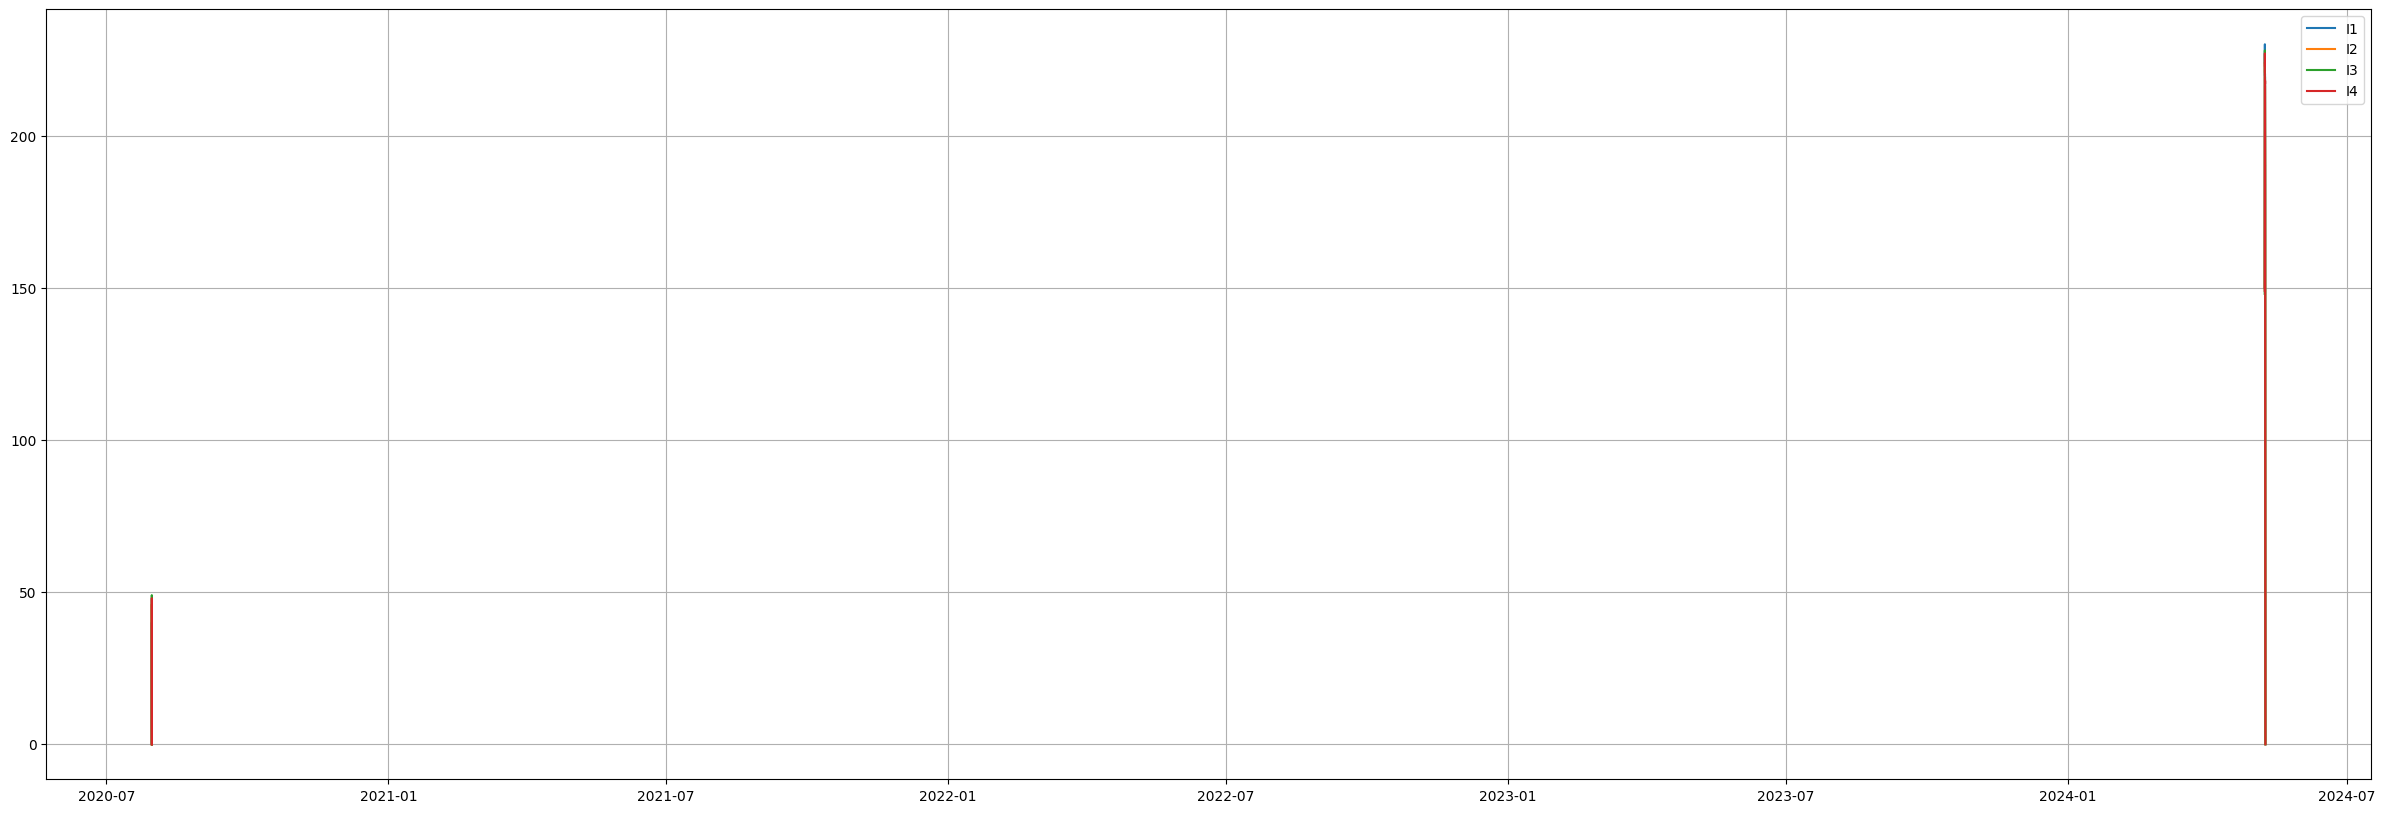

In [ ]:
lineplot_block_inverter_energy(0)

In [ ]:
l[0]

,I1_acenergy,I2_acenergy,I3_acenergy,I4_acenergy,I1,I2,I3,I4
datetime,,,,,,,,
2020-07-30 17:04:00,5.83,5.743,5.746,5.704,0.0,0.0,0.0,0.0
2020-07-30 17:19:00,5.87,5.789,5.795,5.752,40.0,46.0,49.0,48.0
2020-07-30 17:34:00,5.91,5.829,5.838,5.795,40.0,40.0,43.0,43.0
2020-07-30 17:49:00,5.95,5.860,5.869,5.826,40.0,31.0,31.0,31.0
2020-07-30 18:04:00,5.97,5.884,5.894,5.852,20.0,24.0,25.0,26.0
...,...,...,...,...,...,...,...,...
2024-05-08 18:19:00,8.25,8.150,8.315,8.320,10.0,8.0,9.0,8.0
2024-05-08 18:34:00,8.25,8.152,8.317,8.321,0.0,2.0,2.0,1.0
2024-05-08 18:49:00,8.25,8.152,8.317,8.321,0.0,0.0,0.0,0.0
